In [1]:
import pandas as pd
import numpy as np
#import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
opportunities = pd.read_csv("Entrenamieto_ECI_2020.csv")

In [3]:
noneBrand = opportunities[["Brand","ASP_(converted)"]]
noneBrand = noneBrand[noneBrand["Brand"] == "None"]
noneBrand["ASP_(converted)"].mean()

0.437971997178244

In [4]:
brands = opportunities.groupby("Opportunity_ID").agg({"Brand":"unique"})
brands["Total"] = brands["Brand"].apply(lambda x: len(x))
brands = brands[brands["Total"] != 1]
brands
#Veo que todas las oportunidades tengan un solo Brand

,Brand,Total
Opportunity_ID,,


# Veo cantidad de veces que aparece cada brand

In [21]:
opportunities = opportunities[(opportunities["Brand"]!="None")] #Borro los None xq hay casi 16000
opportunities.drop_duplicates(subset="Opportunity_ID",inplace=True)
brands = opportunities[["Brand","Opportunity_ID"]].groupby("Brand").agg({"Opportunity_ID":"count"})
brands.rename(columns={"Opportunity_ID":"Cantidad"},inplace=True)
brands.reset_index(inplace=True)
brands.sort_values(by="Cantidad",inplace=True,ascending=False)
brands["Brand"] = brands["Brand"].apply(lambda x: x.replace("Brand_",""))
brands

,Brand,Cantidad
24,Other,378
23,9,79
20,5,35
3,11,31
14,24,26
2,10,21
12,22,17
11,21,14
5,13,12
22,7,8


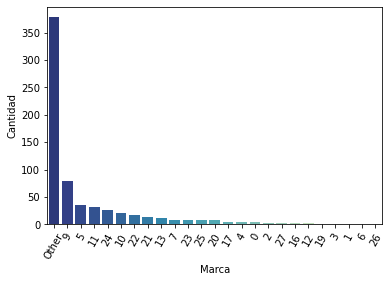

In [23]:
cmap = plt.get_cmap('YlGnBu')
saltos = np.linspace(0.9, 0.1, 25)
colores = cmap(saltos)

plot = sns.barplot(x="Brand",y="Cantidad",data=brands, palette=colores)
plt.xlabel("Marca")
plt.ylabel("Cantidad")
#plt.title("Cantidad de apariciones de cada marca considerando Other")
plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
plt.savefig("img/Brand/CantidadBrand.png")
plt.show(plot)

#brands = brands[brands["Brand"] != "Other"]
#plot = sns.barplot(x="Brand",y="Cantidad",data=brands,order=brands["Brand"])
#plt.savefig("img/Brand/CantidadBrandSinOther.png")
#plt.xlabel("Brand")
#plt.ylabel("Cantidad")
#plt.title("Cantidad de apariciones de cada Brand")
#plt.show(plot)

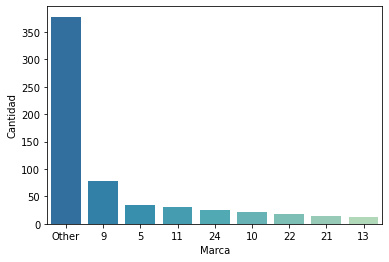

In [24]:
cmap = plt.get_cmap('YlGnBu')
saltos = np.linspace(0.7, 0.3, 9)
colores = cmap(saltos)

brands = brands[brands["Cantidad"] > 10]
plot1 = sns.barplot(x="Brand",y="Cantidad",data=brands, palette=colores)
plt.xlabel("Marca")
plt.ylabel("Cantidad")
plt.savefig("img/Brand/CantidadBrandMasDe10.png")
#plt.title("Cantidad de apariciones de cada Brand considerando Other")
plt.show(plot1)

# Brand vs Stage

In [26]:
brandsVsStage = opportunities[["Brand","Stage","Opportunity_ID"]].groupby(["Brand","Stage"]).agg({"Opportunity_ID":"count"})
brandsVsStage.rename(columns={"Opportunity_ID":"Cantidad"},inplace=True)
totalBrands = brandsVsStage.groupby("Brand").agg({"Cantidad":"sum"})
brandsVsStage.reset_index(inplace=True)
brandsVsStage.set_index("Brand",inplace=True)
brandsVsStage["Total"] = totalBrands["Cantidad"]
brandsVsStage.reset_index(inplace=True)
brandsVsStage["Closed Lost Percentage"] = brandsVsStage["Cantidad"]/brandsVsStage["Total"]
brandsVsStage["Brand"] = brandsVsStage["Brand"].apply(lambda x: x.replace("Brand_",""))
#brandsVsStage = brandsVsStage[brandsVsStage["Total"] > 10]
brandsVsStage.sort_values(by="Total",inplace=True,ascending=True)
brandsVsStage["Cantidad"] = brandsVsStage["Cantidad"]/brandsVsStage["Total"]
brandsVsStage

,Brand,Stage,Cantidad,Total,Closed Lost Percentage
8,19,Closed Lost,1.0,1,1.0
1,1,Closed Lost,1.0,1,1.0
18,3,Closed Lost,1.0,1,1.0
21,6,Closed Lost,1.0,1,1.0
16,26,Closed Lost,1.0,1,1.0
6,16,Closed Lost,1.0,2,1.0
17,27,Closed Lost,1.0,2,1.0
4,12,Closed Lost,1.0,2,1.0
9,2,Closed Lost,1.0,3,1.0
7,17,Closed Lost,1.0,4,1.0


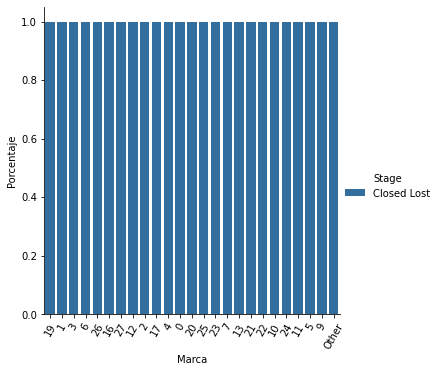

In [27]:
cmap = plt.get_cmap('YlGnBu')
saltos = np.linspace(0.7, 1, 25)
colores = cmap(saltos)

plot = sns.catplot(x="Brand",y="Cantidad",hue="Stage",data=brandsVsStage,kind="bar", palette=colores)
plot.set_xticklabels(rotation=60)
plt.xlabel("Marca")
plt.ylabel("Porcentaje")
#plt.title("Stage por Brand")
plt.savefig("img/Brand/StagePorBrandSinFiltrar.png")
plt.show(plot)

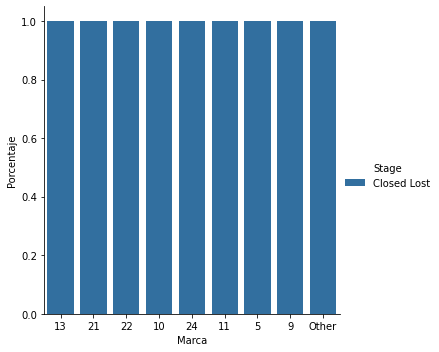

In [28]:
cmap = plt.get_cmap('YlGnBu')
saltos = np.linspace(0.7, 1, 25)
colores = cmap(saltos)

brandsVsStage = brandsVsStage[brandsVsStage["Total"]>10]
fig1 = sns.catplot(x="Brand",y="Cantidad",hue="Stage",data=brandsVsStage,kind="bar",palette=colores)
plt.xlabel("Marca")
plt.ylabel("Porcentaje")
#plt.title("Stage por Brand")
plt.savefig("img/Brand/StagePorBrand.png")
plt.show(fig1)

# Brand vs Product Type

In [29]:
brandVsProductType = opportunities.pivot_table(columns="Product_Type",index="Brand",values="Opportunity_ID",aggfunc="count")
brandVsProductType

Product_Type,None,Other,Product_Type_0,Product_Type_1,Product_Type_2,Product_Type_3,Product_Type_4
Brand,,,,,,,
Brand_0,NaN,NaN,1.0,3.0,NaN,NaN,NaN
Brand_1,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Brand_10,NaN,2.0,5.0,3.0,NaN,10.0,1.0
Brand_11,NaN,3.0,6.0,11.0,1.0,7.0,3.0
Brand_12,1.0,NaN,NaN,1.0,NaN,NaN,NaN
Brand_13,NaN,1.0,2.0,9.0,NaN,NaN,NaN
Brand_16,NaN,NaN,1.0,NaN,NaN,1.0,NaN
Brand_17,NaN,NaN,NaN,1.0,NaN,3.0,NaN
Brand_19,1.0,NaN,NaN,NaN,NaN,NaN,NaN


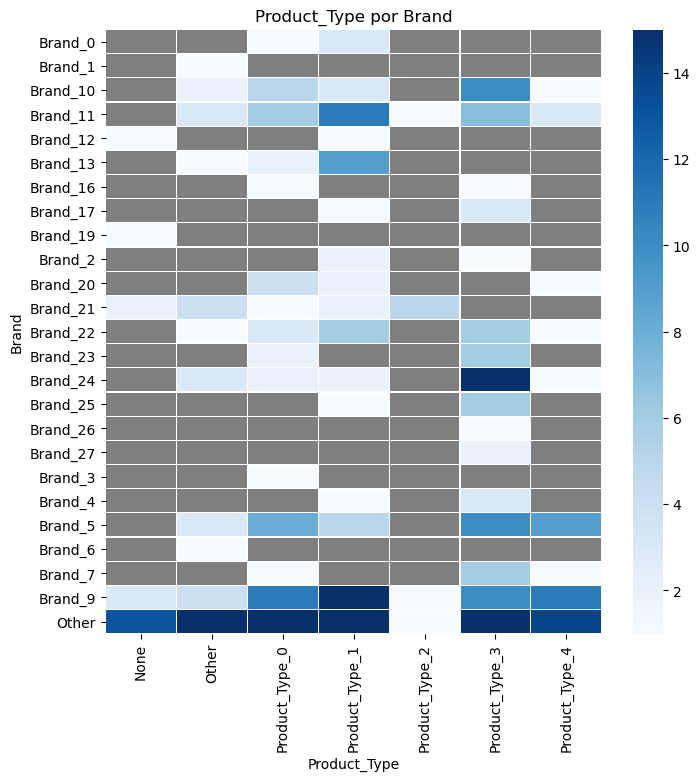

In [13]:
colores = plt.get_cmap("Blues")
colores.set_bad(color='black', alpha=0.5)
fig = plt.figure(num=None, figsize=(8, 8), dpi = 100)
hmap = sns.heatmap(data=brandVsProductType, vmax="15", yticklabels = True, cmap = colores, linewidth = 0.1)
plt.xlabel("Product_Type")
plt.title("Product_Type por Brand")
plt.savefig("img/Brand/ProdTypePorBrand.png")
plt.ylabel("Brand")
plt.show(hmap)

In [14]:
brandVsProductType.drop(index="Other",inplace=True)
brandVsProductType = brandVsProductType.fillna(0)
brandVsProductType

Product_Type,None,Other,Product_Type_0,Product_Type_1,Product_Type_2,Product_Type_3,Product_Type_4
Brand,,,,,,,
Brand_0,0.0,0.0,1.0,3.0,0.0,0.0,0.0
Brand_1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Brand_10,0.0,2.0,5.0,3.0,0.0,10.0,1.0
Brand_11,0.0,3.0,6.0,11.0,1.0,7.0,3.0
Brand_12,1.0,0.0,0.0,1.0,0.0,0.0,0.0
Brand_13,0.0,1.0,2.0,9.0,0.0,0.0,0.0
Brand_16,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Brand_17,0.0,0.0,0.0,1.0,0.0,3.0,0.0
Brand_19,1.0,0.0,0.0,0.0,0.0,0.0,0.0


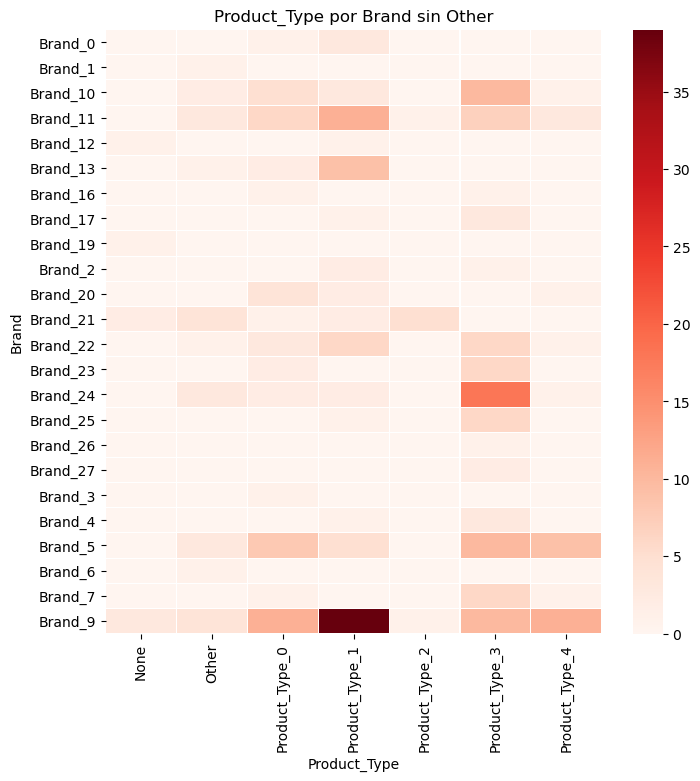

In [15]:
colores = plt.get_cmap("Reds")
colores.set_bad(color='black', alpha=0.5)
fig = plt.figure(num=None, figsize=(8, 8), dpi = 100)
hmap = sns.heatmap(data=brandVsProductType, yticklabels = True, cmap = colores, linewidth = 0.1)
plt.xlabel("Product_Type")
plt.title("Product_Type por Brand sin Other")
plt.savefig("img/Brand/ProdTypePorBrandSinOther.png")
plt.ylabel("Brand")
plt.show(hmap)
#ACA SAQUE LAS BRAND MARCADAS COMO OTHER; PORQUE ESO DEJABA MUY MAL LA ESCALA PORQUE TENIA MUCHAS ENTRADAS

# Veo brand Vs ASP

In [30]:
#ASP(converted) es siempre USD
brandsVsASP = opportunities[["Brand","ASP_(converted)","Opportunity_ID"]].groupby("Brand").agg({"ASP_(converted)":"mean","Opportunity_ID":"count"})
#brandsVsASP = brandsVsASP[brandsVsASP["Opportunity_ID"] > 10]
brandsVsASP = brandsVsASP.reset_index()
brandsVsASP["Brand"] = brandsVsASP["Brand"].apply(lambda x: x.replace("Brand_",""))
brandsVsASP.sort_values(by="ASP_(converted)",inplace=True,ascending=False)
brandsVsASP

,Brand,ASP_(converted),Opportunity_ID
6,16,0.400000,2
21,6,0.400000,1
10,20,0.390500,7
2,10,0.386881,21
13,23,0.378109,8
19,4,0.376463,4
15,25,0.375000,7
11,21,0.374719,14
5,13,0.371518,12
18,3,0.367610,1


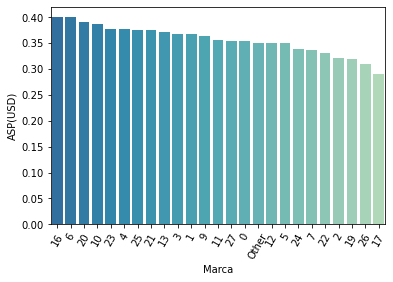

In [32]:
cmap = plt.get_cmap('YlGnBu')
saltos = np.linspace(0.7,0.3,25)
colores = cmap(saltos)

plot = sns.barplot(x="Brand",y="ASP_(converted)",data=brandsVsASP, palette=colores)
plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
plt.xlabel("Marca")
#plt.title("ASP por Brand")
plt.ylabel("ASP(USD)")
plt.savefig("img/Brand/ASPPorBrandSinFiltro.png")
plt.show(plot)

In [33]:
brandsVsASP["ASP_(converted)"].mean()

0.35655397153234936

In [34]:
brandsVsASP = brandsVsASP[brandsVsASP["Opportunity_ID"] > 10]
brandsVsASP["ASP_(converted)"].mean()

0.3579879500237217

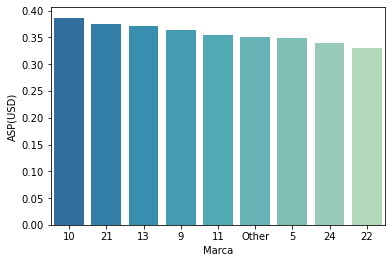

In [35]:
cmap = plt.get_cmap('YlGnBu')
saltos = np.linspace(0.7,0.3,9)
colores = cmap(saltos)

plot = sns.barplot(x="Brand",y="ASP_(converted)",data=brandsVsASP, palette=colores)
#NO ME DICE NADA ESTO
plt.xlabel("Marca")
#plt.title("ASP por Brand")
plt.ylabel("ASP(USD)")
plt.savefig("img/Brand/ASPPorBrand.png")
plt.show(plot)